In [1]:
#Coronavirus forecast
# get the newest update of overrall state 

In [2]:
import pandas as pd

#handnle raw data
import utils

import numpy as np
import os

In [3]:
#df=utils.load_chinese_data()
_DXY_DATA_PATH_ = 'https://raw.githubusercontent.com/BlankerL/DXY-2019-nCoV-Data/master/csv/DXYArea.csv'
df = pd.read_csv(_DXY_DATA_PATH_)
df['updateTime'] = pd.to_datetime(df['updateTime'])  # original type of updateTime after read_csv is 'str'
df['updateDate'] = df['updateTime'].dt.date    # add date for daily aggregation
# display basic info
print('updated on: ', df['updateTime'].max())
print('date range ', df['updateDate'].min(), 'to', df['updateDate'].max())
print('number of data: ', df.shape[0])

updated on:  2020-02-10 16:45:25.360000
date range  2020-01-24 to 2020-02-10
number of data:  30227


In [4]:
df.head(5)

,provinceName,cityName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime,updateDate
0,广东省,深圳,1159,0,165,1,369,0,56,0,2020-02-10 16:45:25.360,2020-02-10
1,广东省,广州,1159,0,165,1,314,0,42,0,2020-02-10 16:45:25.360,2020-02-10
2,广东省,珠海,1159,0,165,1,85,0,4,0,2020-02-10 16:45:25.360,2020-02-10
3,广东省,佛山,1159,0,165,1,70,0,4,0,2020-02-10 16:45:25.360,2020-02-10
4,广东省,东莞,1159,0,165,1,60,0,3,0,2020-02-10 16:45:25.360,2020-02-10


In [5]:
df.columns

Index(['provinceName', 'cityName', 'province_confirmedCount',
       'province_suspectedCount', 'province_curedCount', 'province_deadCount',
       'city_confirmedCount', 'city_suspectedCount', 'city_curedCount',
       'city_deadCount', 'updateTime', 'updateDate'],
      dtype='object')

In [6]:
#select on sample 
sample=df[df.cityName=='牡丹江']

In [7]:
sample.updateTime[:30]

166     2020-02-10 15:27:06.531
338     2020-02-10 13:44:34.992
1131    2020-02-10 08:24:43.433
2411    2020-02-09 16:36:17.092
2453    2020-02-09 16:35:16.423
3892    2020-02-09 08:55:45.123
5018    2020-02-08 16:32:08.225
6065    2020-02-08 12:01:33.720
6297    2020-02-08 10:07:03.993
6399    2020-02-08 09:48:47.924
7924    2020-02-07 15:39:47.159
7947    2020-02-07 15:38:46.248
8411    2020-02-07 12:56:42.519
8543    2020-02-07 11:28:35.167
9026    2020-02-07 09:33:04.188
9161    2020-02-07 09:14:51.298
9217    2020-02-07 09:01:42.299
10451   2020-02-06 16:09:14.631
10463   2020-02-06 16:07:13.266
10823   2020-02-06 12:26:29.302
11254   2020-02-06 09:47:31.251
11267   2020-02-06 09:46:30.407
11388   2020-02-06 09:20:10.679
11400   2020-02-06 09:18:09.354
11412   2020-02-06 09:16:07.870
12118   2020-02-05 20:04:57.566
12413   2020-02-05 18:04:02.663
12425   2020-02-05 17:38:16.315
12437   2020-02-05 17:37:15.758
13481   2020-02-05 09:22:31.796
Name: updateTime, dtype: datetime64[ns]

In [8]:
'''
as the date provide by api, the number of each day is different
clear the dataframe to extract the representer for each day
'''

'\nas the date provide by api, the number of each day is different\nclear the dataframe to extract the representer for each day\n'

In [9]:
#drop provinceConfirmedcunt, cured, dead, as can added all the cities in one province
temp=df.drop(['province_confirmedCount', 'province_suspectedCount', 'province_curedCount', 'province_deadCount'],axis=1)

In [10]:
temp is pd.DataFrame

False

In [11]:
#remove some data that too short
    #agg for aggragate
counter=temp.groupby('updateDate').agg({'provinceName': pd.Series.nunique})

In [12]:
temp_drop=counter[counter['provinceName']<25].index
temp[~temp['updateDate'].isin(temp_drop)]

,provinceName,cityName,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime,updateDate
0,广东省,深圳,369,0,56,0,2020-02-10 16:45:25.360,2020-02-10
1,广东省,广州,314,0,42,0,2020-02-10 16:45:25.360,2020-02-10
2,广东省,珠海,85,0,4,0,2020-02-10 16:45:25.360,2020-02-10
3,广东省,佛山,70,0,4,0,2020-02-10 16:45:25.360,2020-02-10
4,广东省,东莞,60,0,3,0,2020-02-10 16:45:25.360,2020-02-10
...,...,...,...,...,...,...,...,...
30222,云南省,昆明,2,0,0,0,2020-01-24 03:50:31.353,2020-01-24
30223,山西省,太原,1,0,0,0,2020-01-24 03:50:31.353,2020-01-24
30224,吉林省,长春,1,0,0,0,2020-01-24 03:50:31.353,2020-01-24
30225,河北省,石家庄,1,0,0,0,2020-01-24 03:50:31.353,2020-01-24


In [13]:
re=temp.groupby(['cityName','updateDate'])
new_df=pd.DataFrame([], columns=temp.columns)
for key, values in re:
    new_df=pd.concat([new_df, re.get_group(key).sort_values('updateTime', ascending=False)[:1]])

In [14]:
#updateDate not duplicated now 
new_df[new_df['cityName']=='七台河']

,provinceName,cityName,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime,updateDate
26973,黑龙江省,七台河,1,0,0,0,2020-01-27 09:10:03.105,2020-01-27
26031,黑龙江省,七台河,2,0,0,0,2020-01-28 09:05:57.968,2020-01-28
24725,黑龙江省,七台河,2,0,0,0,2020-01-29 14:36:48.788,2020-01-29
23242,黑龙江省,七台河,2,0,0,0,2020-01-30 23:05:57.689,2020-01-30
22853,黑龙江省,七台河,3,0,0,0,2020-01-31 09:06:24.750,2020-01-31
19840,黑龙江省,七台河,5,0,0,0,2020-02-01 18:29:15.389,2020-02-01
18516,黑龙江省,七台河,6,0,0,0,2020-02-02 11:18:10.235,2020-02-02
16634,黑龙江省,七台河,7,0,0,0,2020-02-03 15:10:41.923,2020-02-03
14861,黑龙江省,七台河,8,0,0,0,2020-02-04 15:37:37.598,2020-02-04
12119,黑龙江省,七台河,9,0,0,0,2020-02-05 20:04:57.566,2020-02-05


In [15]:
import matplotlib
print(matplotlib.matplotlib_fname())

/Users/timyang/Documents/Data_Analysis/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


In [16]:
import matplotlib.font_manager
matplotlib.font_manager._rebuild()

In [35]:
[f for f in matplotlib.font_manager.fontManager.ttflist if 'Heiti' in f.name]

[<Font 'Heiti TC' (STHeiti Medium.ttc) normal normal medium normal>,
 <Font 'Heiti TC' (STHeiti Light.ttc) normal normal light normal>]

In [40]:
matplotlib.rcParams['font.family']=['Heiti TC']

In [41]:
def horizontal_compare(df, date_str, col, title='', groupby='provinceName', largestN=0, figsize=(13, 10), fontsize=15):
    date = pd.to_datetime(date_str)
    df_date = df[df['updateDate'] == date]
    group_frm = df_date.groupby(groupby).agg('sum').sort_values(by=col, ascending=True)
    if largestN > 0:
        group_frm = group_frm[-largestN:]  # only plot the first N bars
    ax = group_frm.plot.barh(y=col, grid=True, figsize=figsize)
    ax.set_yticklabels(group_frm.index) 
    ax.set_title(date_str + '  ' + title, fontsize=fontsize)
    ax.legend(loc='lower right')
    return ax

In [42]:
new_df.columns

Index(['provinceName', 'cityName', 'city_confirmedCount',
       'city_suspectedCount', 'city_curedCount', 'city_deadCount',
       'updateTime', 'updateDate'],
      dtype='object')

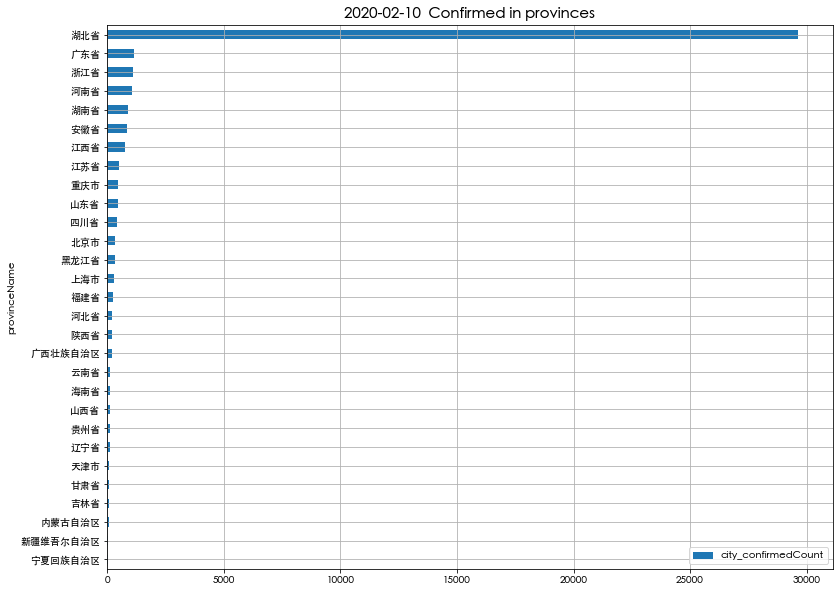

In [43]:
horizontal_compare(new_df, '2020-02-10', col='city_confirmedCount', groupby='provinceName', title='Confirmed in provinces')

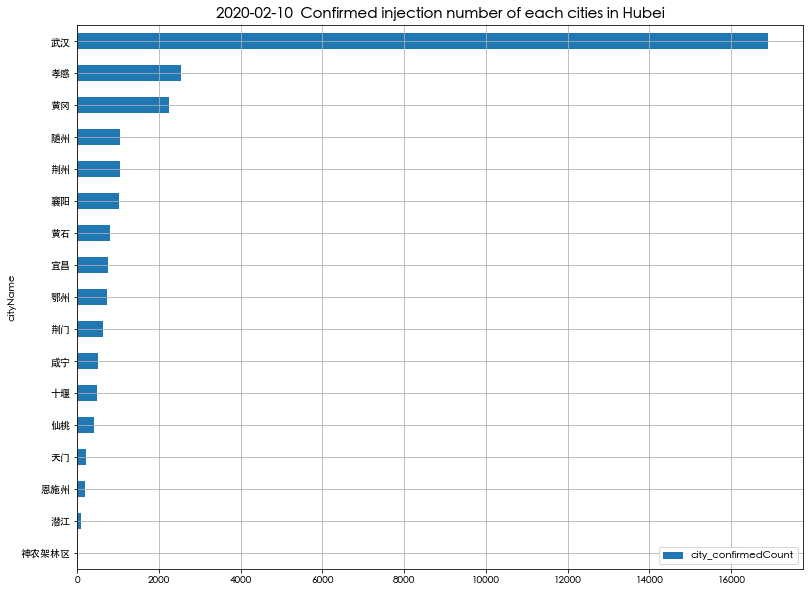

In [49]:
horizontal_compare(new_df[new_df['provinceName']=='湖北省'], '2020-02-10', col='city_confirmedCount', groupby='cityName', title='Confirmed injection number of each cities in Hubei')

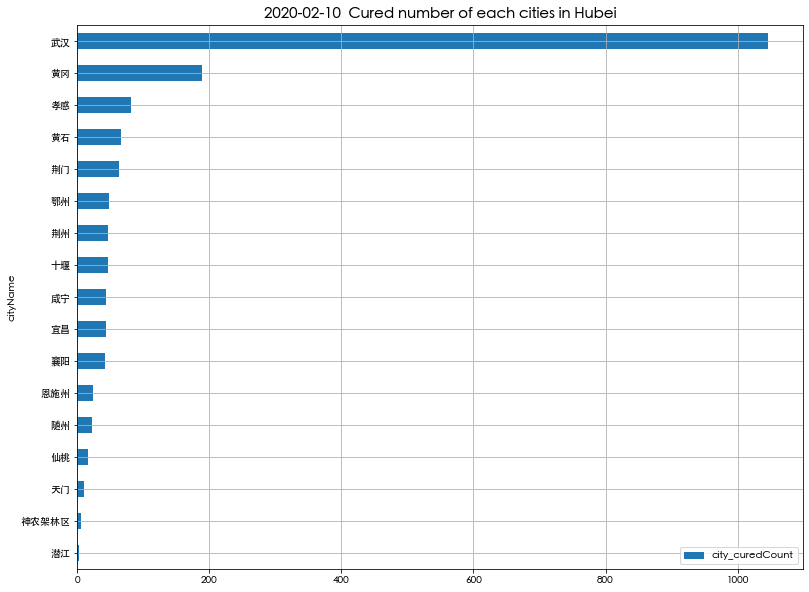

In [51]:
horizontal_compare(new_df[new_df['provinceName']=='湖北省'], '2020-02-10', col='city_curedCount', groupby='cityName', title='Cured number of each cities in Hubei')